In [1]:
import pandas as pd
import numpy as np

col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

dataset = pd.read_csv('car_evaluation.csv', names=col_names)
X=dataset.iloc[:,:-1].values
Y= dataset.iloc[:,-1].values
dataset.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [2]:
feature_names = list(dataset.columns.values[:-1])
for feature in feature_names:
    unique_count = dataset[feature].nunique()
    unique_vals = dataset[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

buying: 4 values, ['vhigh' 'high' 'med' 'low']
maint: 4 values, ['vhigh' 'high' 'med' 'low']
doors: 4 values, ['2' '3' '4' '5more']
persons: 3 values, ['2' '4' 'more']
lug_boot: 3 values, ['small' 'med' 'big']
safety: 3 values, ['low' 'med' 'high']


In [3]:
label_name = dataset.columns.values[-1]
print("{}: {} values, {}".format(label_name, dataset[label_name].nunique(), dataset[label_name].unique()))
dataset[label_name].value_counts()


class: 4 values, ['unacc' 'acc' 'vgood' 'good']


unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [4]:
data_encoded = pd.get_dummies(dataset, columns=feature_names, drop_first=True)
data_encoded.tail()


,class,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
1723,good,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1724,vgood,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1725,unacc,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1726,good,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1727,vgood,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [5]:
data_encoded['class'], class_uniques = pd.factorize(data_encoded['class'])
data_encoded.tail()

,class,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
1723,3,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1
1724,2,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0
1725,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1726,3,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1
1727,2,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0


In [6]:
# Save the class column as a Pandas Series.
class_col = data_encoded['class']
# Remove class column from DataFrame.
data_encoded.drop(columns=['class'], inplace=True)
# Get the position of where the last column will be inserted.
last_col_pos = data_encoded.columns.get_loc('safety_med') + 1
# Insert the class column back into the DataFrame.
data_encoded.insert(last_col_pos, 'class', class_col)
data_encoded.tail()

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med,class
1723,1,0,0,1,0,0,0,0,1,0,1,1,0,0,1,3
1724,1,0,0,1,0,0,0,0,1,0,1,1,0,0,0,2
1725,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0
1726,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,3
1727,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,2


In [7]:
from sklearn.model_selection import train_test_split
# Features.
X = data_encoded.loc[:, 'buying_low':'safety_med']
# Labels.
y = data_encoded.loc[:, 'class']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)



In [8]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric="minkowski")
classifier.fit(X_train,Y_train)
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import classification_report

# Display the precision, recall and F1 score for each class.
print(classification_report(Y_test, y_pred, labels=['unacc', 'acc', 'good', 'vgood']))

              precision    recall  f1-score   support

       unacc       0.88      0.96      0.92       240
         acc       0.67      0.59      0.63        79
        good       0.11      0.06      0.08        17
       vgood       0.33      0.10      0.15        10

    accuracy                           0.81       346
   macro avg       0.50      0.43      0.44       346
weighted avg       0.78      0.81      0.79       346



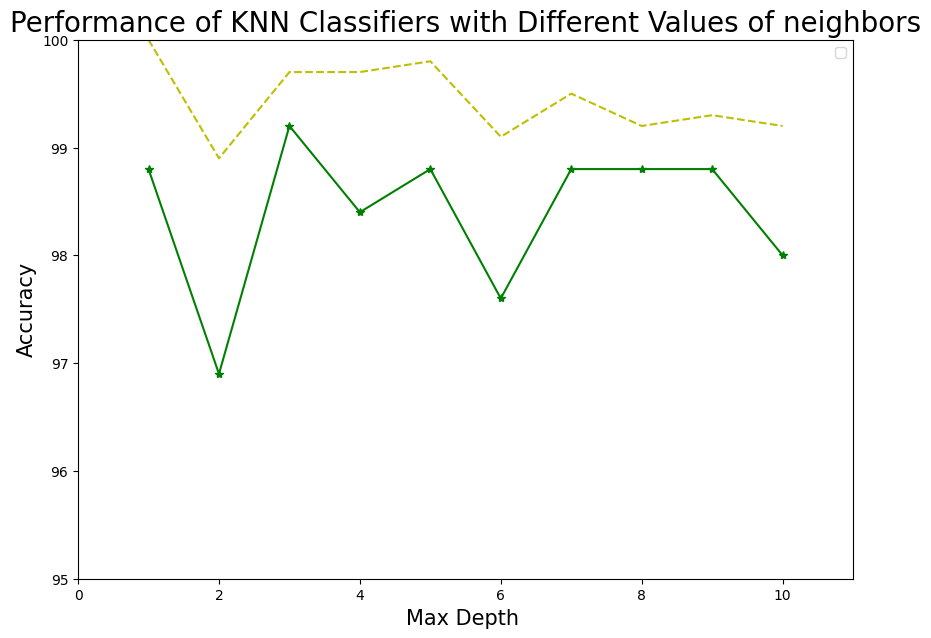

In [11]:
import matplotlib.pyplot as plt

max_neighbors = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
Training_Accuracy = np.array([100, 98.9, 99.7, 99.7, 99.8, 99.1, 99.5, 99.2, 99.3, 99.2])
Testing_Accuracy = np.array([98.8, 96.9, 99.2, 98.4, 98.8, 97.6, 98.8, 98.8, 98.8, 98])

plt.rcParams['figure.figsize'] = (10, 7)
plt.plot(max_neighbors, Training_Accuracy, 'y--')
plt.plot(max_neighbors, Testing_Accuracy, 'g-*')
plt.title('Performance of KNN Classifiers with Different Values of neighbors', fontsize = 20)
plt.xlim([0, 11])
plt.ylim([95, 100])
plt.xlabel('Max Depth ', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 234, in predict
    neigh_ind = self.kneighbors(X, return_distance=False)
  File "/us

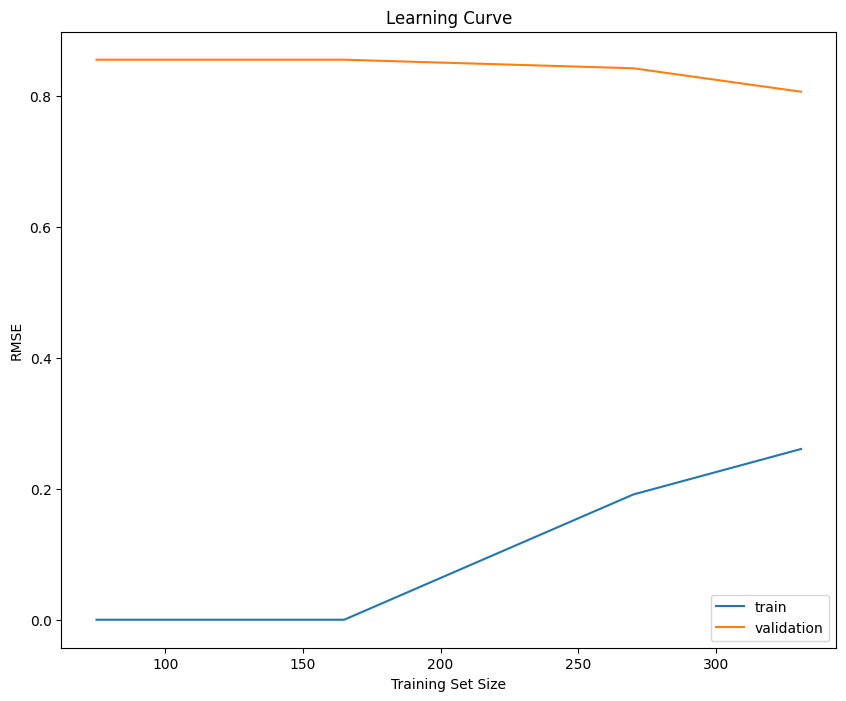

In [12]:

from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

# overfitting
knn =KNeighborsClassifier()


train_sizes, train_scores, test_scores = learning_curve(
    estimator=knn,
    X=X,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = [1, 75, 165, 270, 331]
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

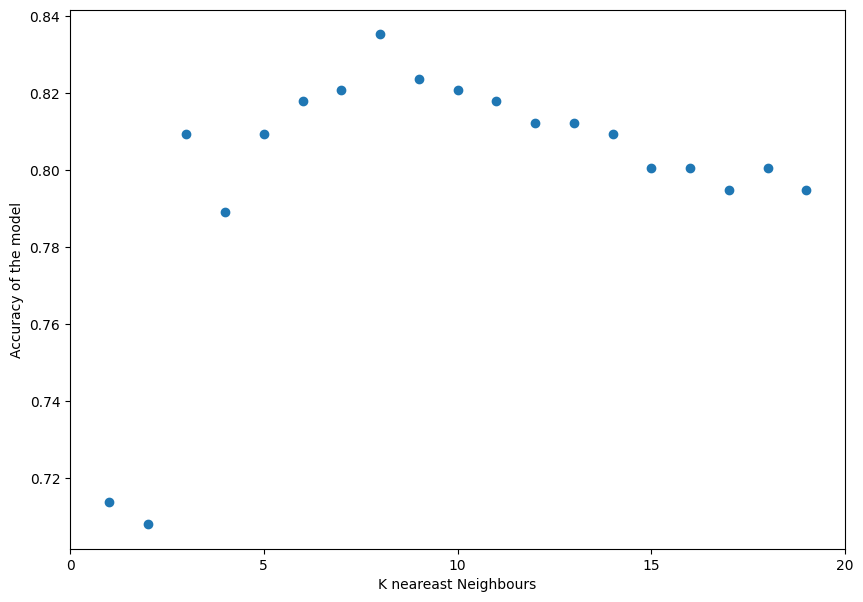

In [16]:
scores = []

for k in np.arange(1,20):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    scores.append(knn.score(X_test, Y_test))

plt.figure()
plt.xlabel('K neareast Neighbours')
plt.ylabel('Accuracy of the model')
plt.scatter(np.arange(1,20), scores)
plt.xticks([0,5,10,15,20]);

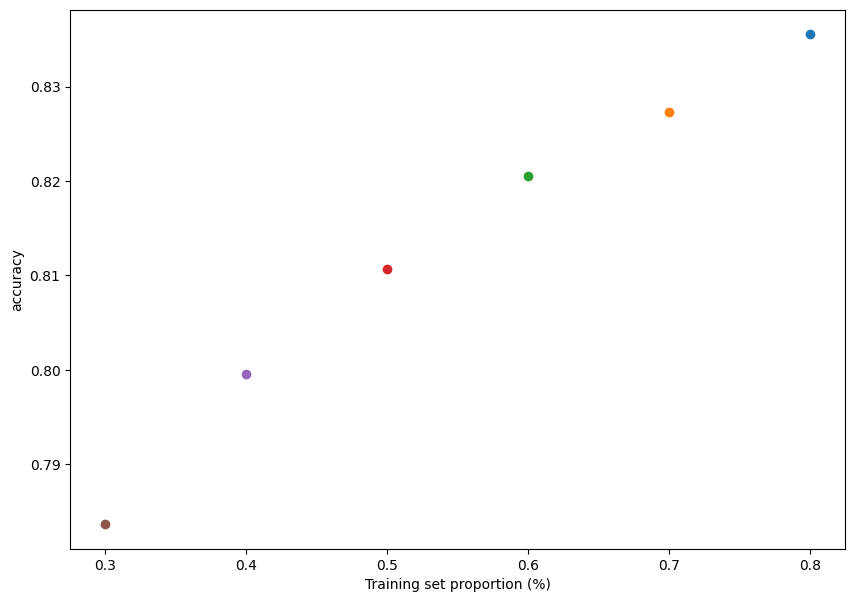

In [17]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    scores = []
    for i in range(1,500):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'o')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');